In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Načtení datové sady do formatu pandas dataframe

In [70]:
file = "students_mental_health_survey.csv"
df = pd.read_csv(file)
print(df)

      Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3                 5   

      Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality  \
0      

Získání základních informací o datové sadě

In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

Popisná statistika pro numerické sloupce datové sady.

In [72]:
print(df.describe())

               Age        CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  7022.000000  7010.00000   7022.000000       7022.000000    7022.000000   
mean     23.003418     3.49127      2.427941          2.254486       2.300484   
std       3.853978     0.28742      1.638408          1.625193       1.624305   
min      18.000000     2.44000      0.000000          0.000000       0.000000   
25%      20.000000     3.29000      1.000000          1.000000       1.000000   
50%      22.000000     3.50000      2.000000          2.000000       2.000000   
75%      25.000000     3.70000      4.000000          3.000000       4.000000   
max      35.000000     4.00000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       7022.000000           7022.000000  
mean           2.453005             22.010538  
std            1.708995              4.358380  
min            0.000000             15.000000  
25%            1.000000       

Nejčatější hodnoty a jejich frekvence pro jednotlivé kategorie.

In [73]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(df[column].value_counts())
    print("\n")

Course
Medical             2105
Law                 1385
Engineering         1072
Computer Science    1028
Business             717
Others               715
Name: count, dtype: int64


Gender
Male      3547
Female    3475
Name: count, dtype: int64


Sleep_Quality
Good       3589
Average    2735
Poor        698
Name: count, dtype: int64


Physical_Activity
Moderate    3521
Low         2091
High        1410
Name: count, dtype: int64


Diet_Quality
Average    4268
Good       1385
Poor       1369
Name: count, dtype: int64


Social_Support
Moderate    3470
High        2176
Low         1376
Name: count, dtype: int64


Relationship_Status
Single               3574
In a Relationship    2079
Married              1369
Name: count, dtype: int64


Substance_Use
Never           5903
Occasionally     699
Frequently       405
Name: count, dtype: int64


Counseling_Service_Use
Never           4263
Occasionally    2081
Frequently       678
Name: count, dtype: int64


Family_History
No     4866
Yes    2

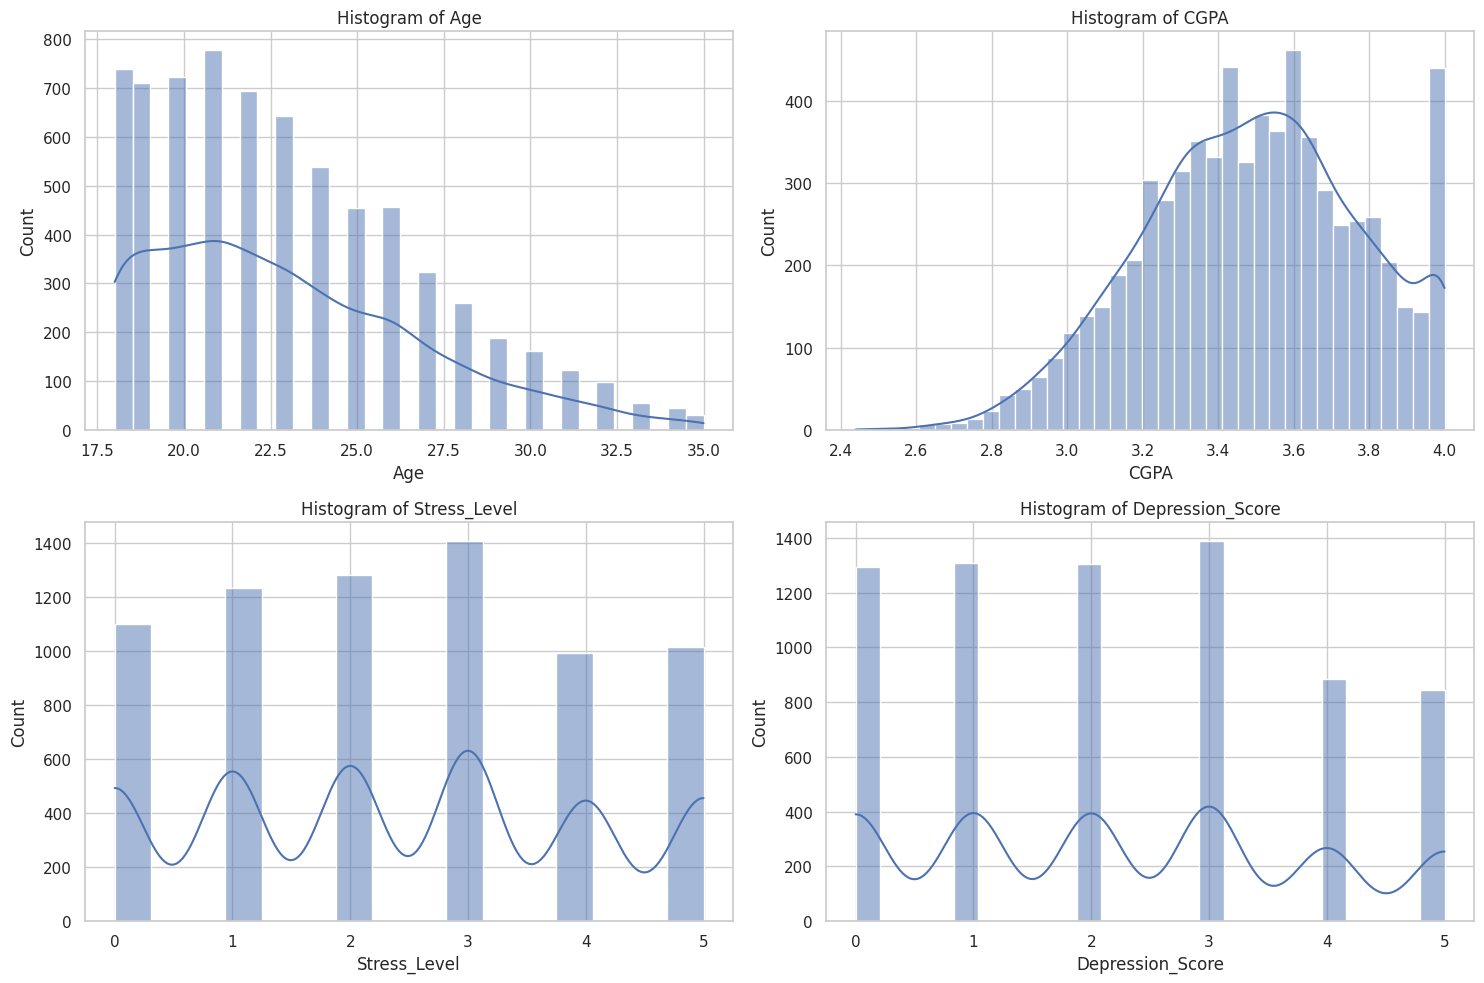

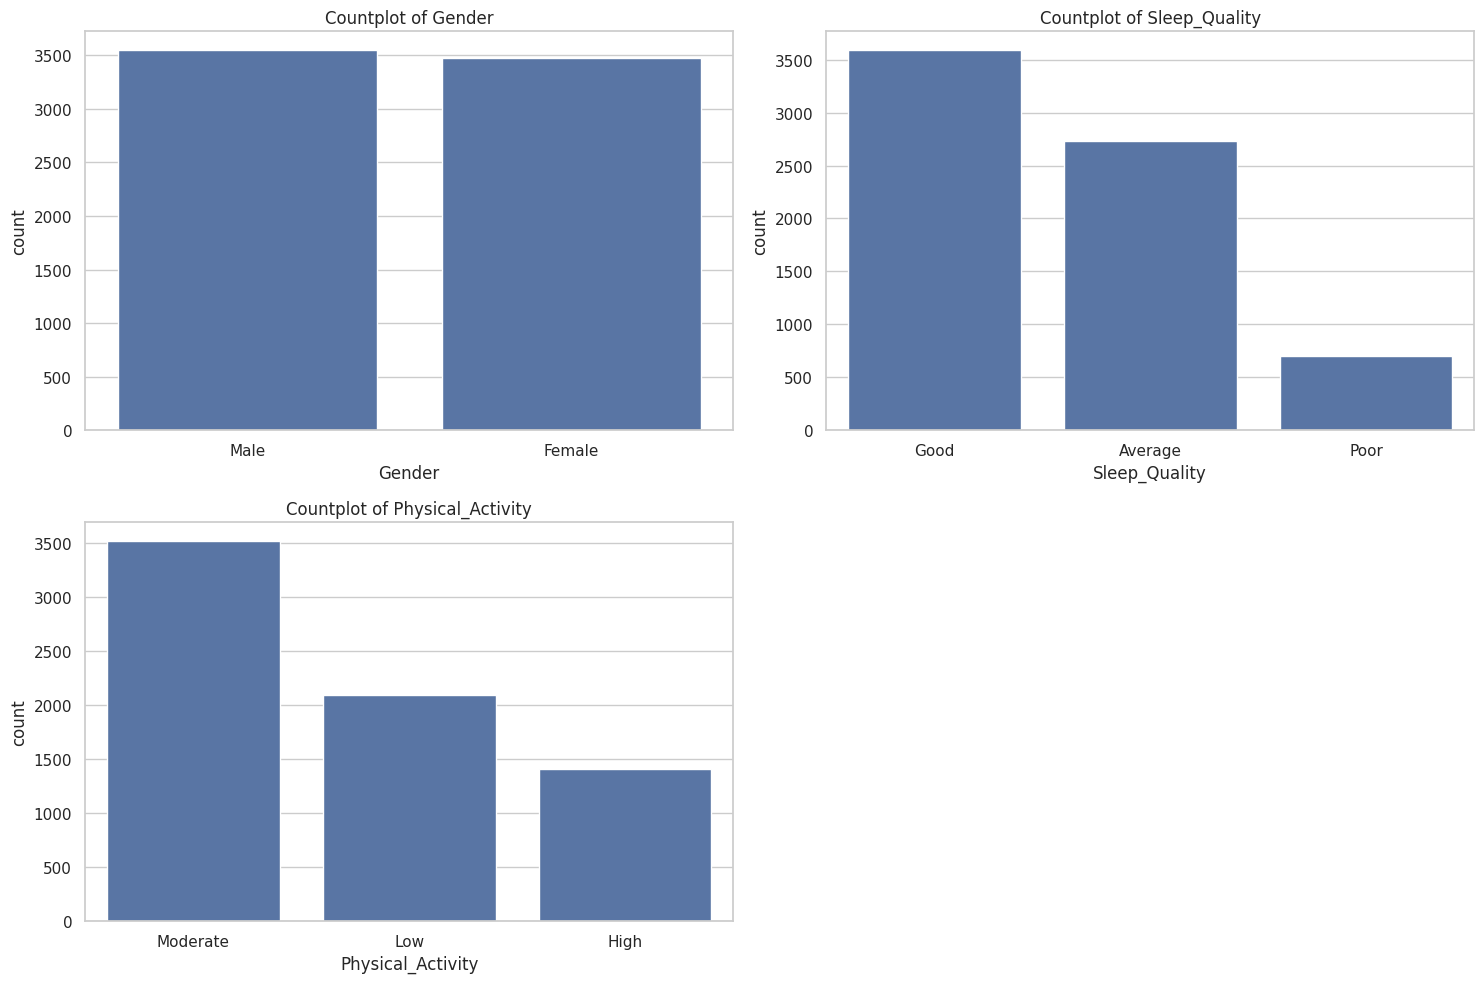

In [74]:
# Nastavení stylu grafů
sns.set(style="whitegrid")

# Univariátní analýza: Numerické proměnné
numerical_columns = ['Age', 'CGPA', 'Stress_Level', 'Depression_Score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Univariátní analýza: Kategorické proměnné
categorical_columns = ['Gender', 'Sleep_Quality', 'Physical_Activity']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

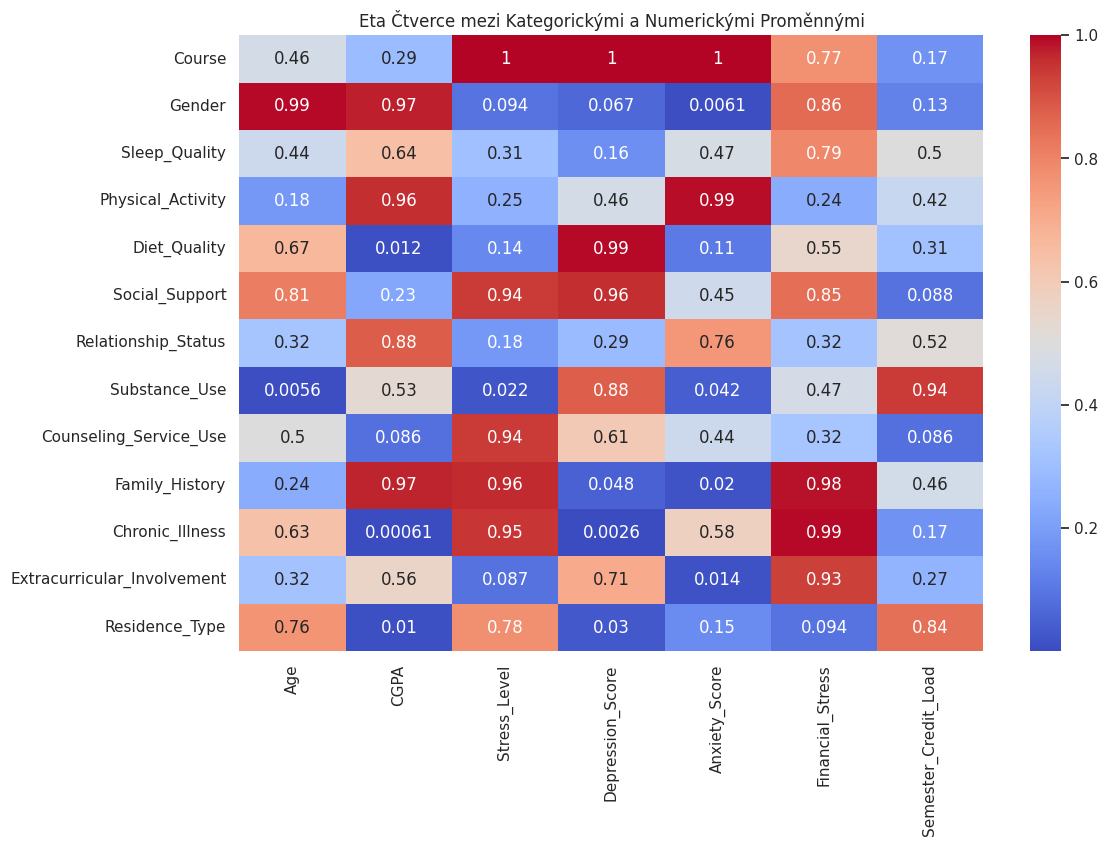

In [89]:
from sklearn.feature_selection import f_classif

df = df.dropna()

def eta_squared(X, y):
    """ Výpočet Eta čtverce pro vztah mezi kategorickou a numerickou proměnnou. """
    anova = f_classif(X, y)
    eta_sq = anova[0] / (anova[0] + anova[1])
    return eta_sq

categorical_cols = df.select_dtypes(include=['object']).columns
# Výběr numerických sloupců
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Vytvoření DataFrame pro výsledky Eta čtverce
eta_squared_results = pd.DataFrame(index=categorical_cols, columns=numerical_columns)

# Výpočet Eta čtverce pro každou kombinaci kategorických a numerických sloupců
for cat_col in categorical_cols:
    for num_col in numerical_columns:
        eta_sq = eta_squared(df[[num_col]], df[cat_col])
        eta_squared_results.loc[cat_col, num_col] = eta_sq[0]

# Vizualizace výsledků
plt.figure(figsize=(12, 8))
sns.heatmap(eta_squared_results.astype(float), annot=True, cmap='coolwarm')
plt.title('Eta Čtverce mezi Kategorickými a Numerickými Proměnnými')
plt.show()

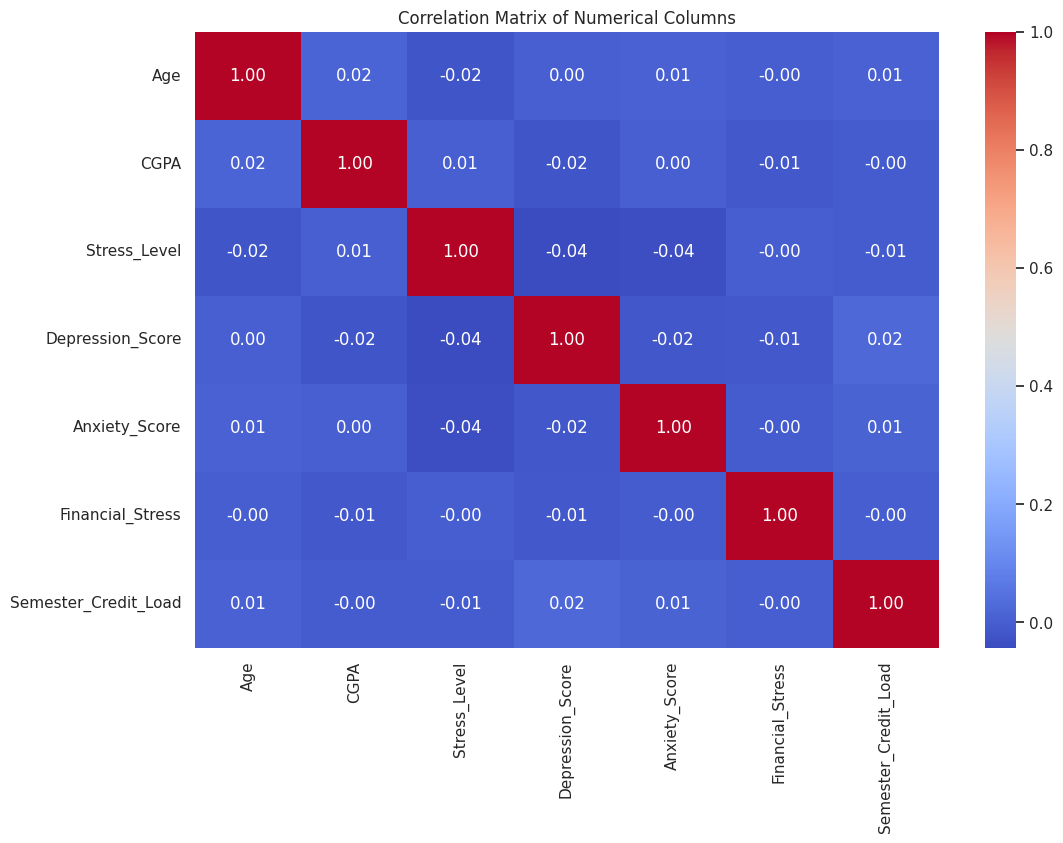

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

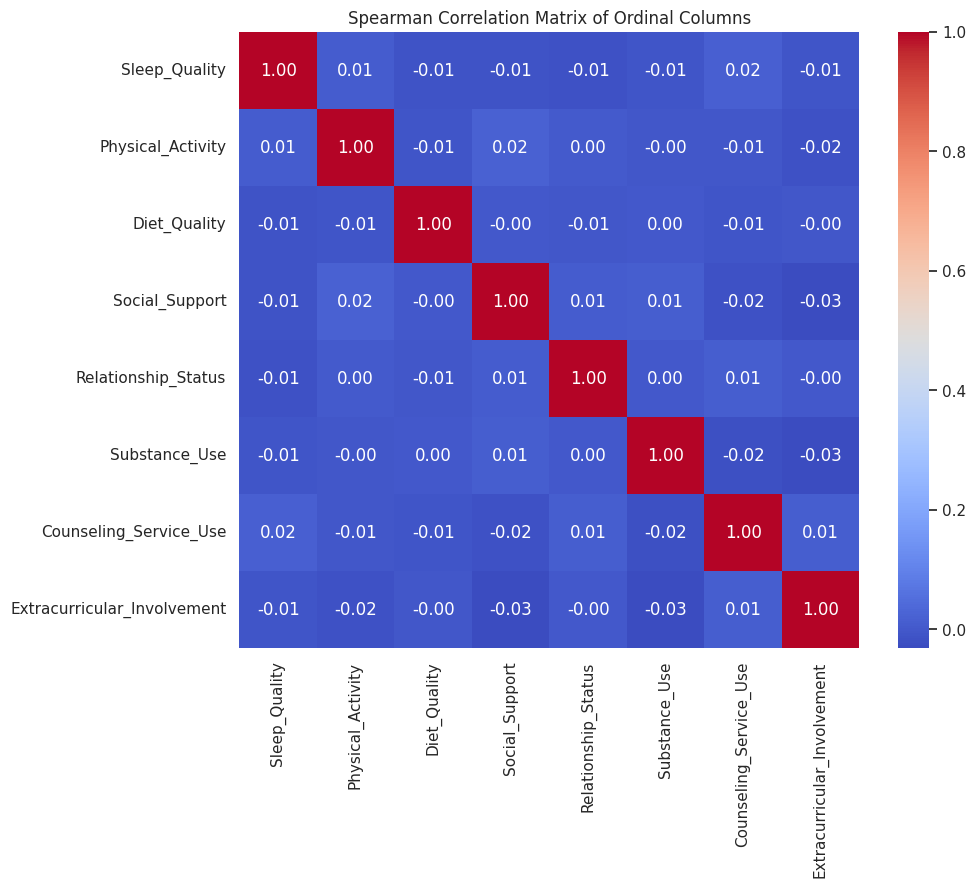

In [94]:
# Selecting only the columns that can be considered as ordinal
ordinal_columns = ['Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 
                   'Social_Support', 'Relationship_Status', 'Substance_Use', 
                   'Counseling_Service_Use', 'Extracurricular_Involvement']

# Encoding the ordinal columns as numerical values for correlation analysis
# Assuming the levels in the ordinal columns have a natural order
ordinal_data = df[ordinal_columns].apply(lambda x: x.astype("category").cat.codes)

# Calculating Spearman correlation matrix for the ordinal columns
spearman_correlation_matrix = ordinal_data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Spearman Correlation Matrix of Ordinal Columns")
plt.show()

Ted vytvorime grafy pro pary s vysokou hodnotou korelace

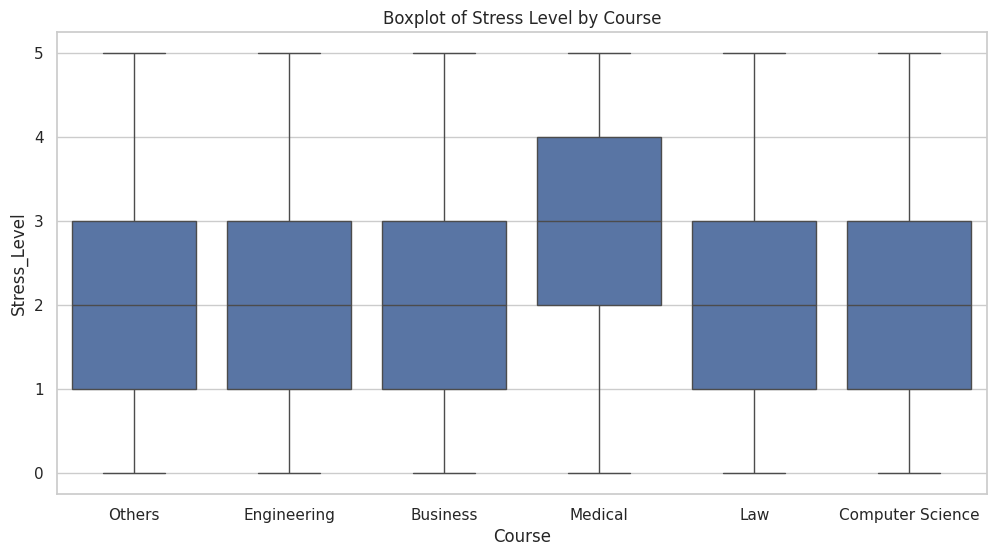

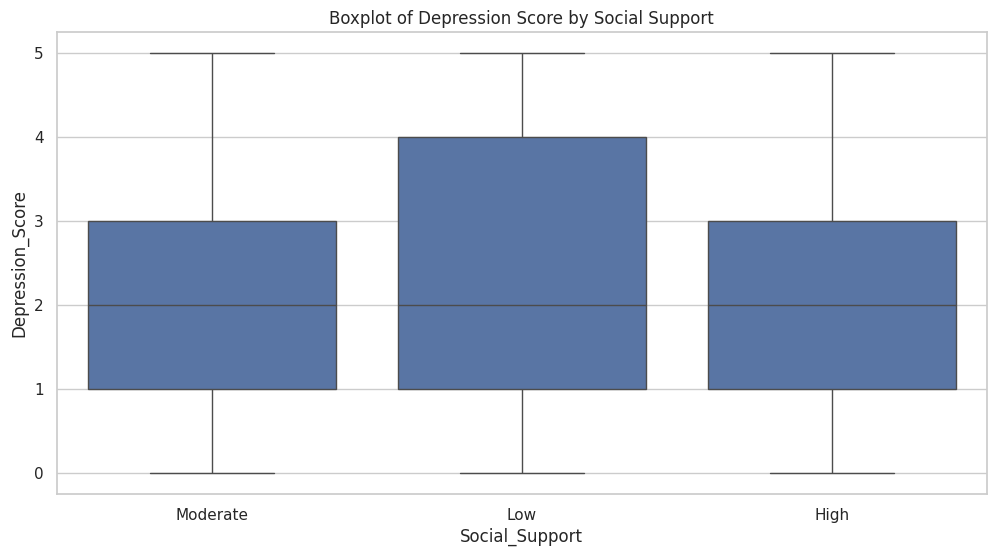

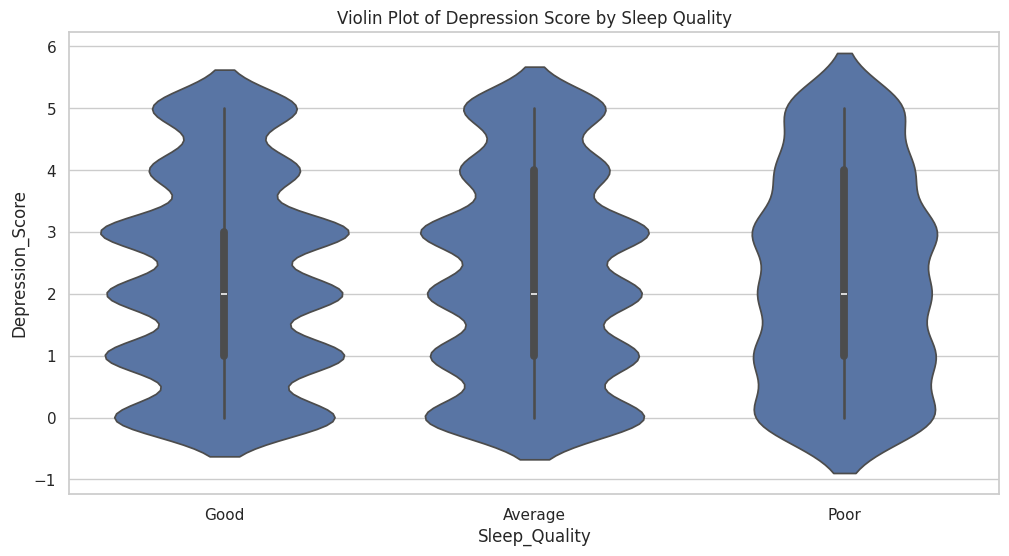

/tmp/ipykernel_286444/1820254525.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Stress_Level', data=average_stress_by_age, palette='viridis', edgecolor="k")


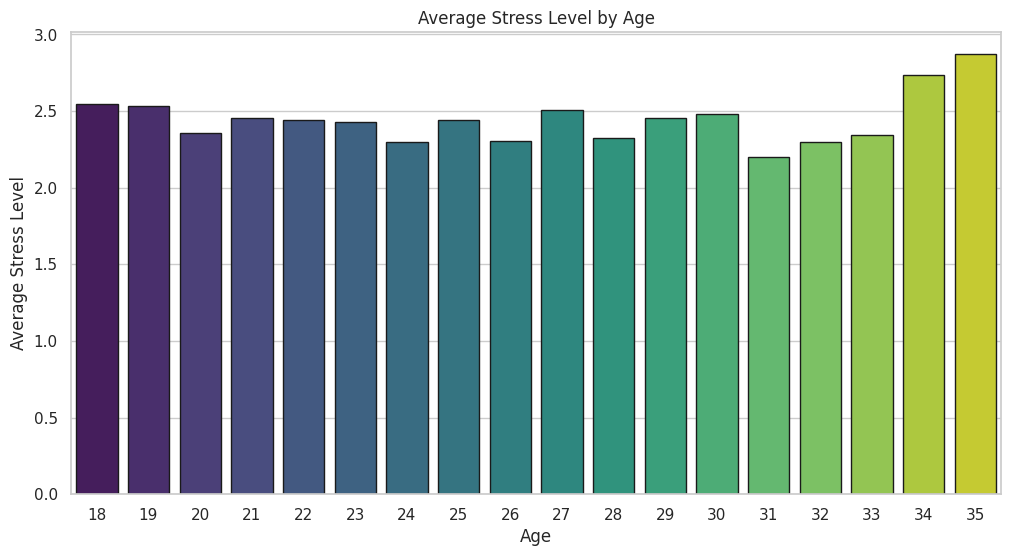

/tmp/ipykernel_286444/1820254525.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Stress_Level', data=median_stress_by_age, palette='viridis', edgecolor="k")


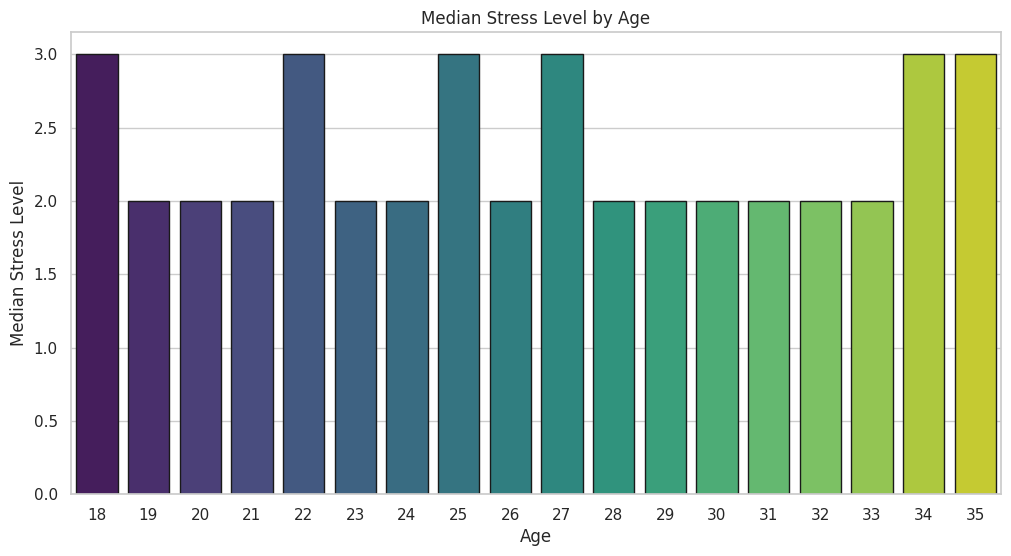

In [103]:
# Plotting a boxplot for 'Course' and 'Stress_Level'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Stress_Level', data=df)
plt.title("Boxplot of Stress Level by Course")
plt.show()
# Plotting a boxplot for 'Social_Support' and 'Depression_Score'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Social_Support', y='Depression_Score', data=df)
plt.title("Boxplot of Depression Score by Social Support")
plt.show()
# Plotting a violin plot for 'Sleep_Quality' and 'Depression_Score'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sleep_Quality', y='Depression_Score', data=df)
plt.title("Violin Plot of Depression Score by Sleep Quality")
plt.show()
# Calculating the average stress level for each age
average_stress_by_age = df.groupby('Age')['Stress_Level'].mean().reset_index()

# Plotting the histogram of average stress level for each age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Stress_Level', data=average_stress_by_age, palette='viridis', edgecolor="k")
plt.title("Average Stress Level by Age")
plt.xlabel("Age")
plt.ylabel("Average Stress Level")
plt.show()
# Calculating the median stress level for each age
median_stress_by_age = df.groupby('Age')['Stress_Level'].median().reset_index()

# Plotting the histogram of median stress level for each age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Stress_Level', data=median_stress_by_age, palette='viridis', edgecolor="k")
plt.title("Median Stress Level by Age")
plt.xlabel("Age")
plt.ylabel("Median Stress Level")
plt.show()